In [1]:
library(dplyr)
library(ggplot2)
library(ggmap)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggmap' was built under R version 3.3.3"

In [2]:
setwd("C:/Users/Aeint Thet Ngon/Documents/Portfolio/Capital Bikeshare/2016")

In [3]:
files=list.files(pattern="*.csv")
names=c("q1", "q2", "q3a","q3b", "q4")

for (i in 1:length(files)){
  assign(names[i], read.csv(files[i]))
}

colnames(q2)[9] <- "Member.Type"

quarter="q1"
q1 <- cbind(q1, quarter)
quarter="q2"
q2 <- cbind(q2, quarter)
quarter="q3"
q3a <- cbind(q3a, quarter)
quarter="q3"
q3b <- cbind(q3b, quarter)
quarter="q4"
q4 <- cbind(q4, quarter)

In [4]:
trips <- rbind(q1, q2, q3a, q3b, q4)

trips <- trips %>%
  mutate(startDT=as.POSIXct(strptime(trips$Start.date, "%m/%d/%Y %H:%M")),
         endDT=as.POSIXct(strptime(trips$End.date, "%m/%d/%Y %H:%M")))

rm(q1, q2, q3a, q3b, q4)

head(trips)

Duration..ms.,Start.date,End.date,Start.station.number,Start.station,End.station.number,End.station,Bike.number,Member.Type,quarter,startDT,endDT
301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,q1,2016-03-31 23:59:00,2016-04-01 00:04:00
557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,q1,2016-03-31 23:59:00,2016-04-01 00:08:00
555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,q1,2016-03-31 23:59:00,2016-04-01 00:08:00
766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,q1,2016-03-31 23:57:00,2016-04-01 00:09:00
139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,q1,2016-03-31 23:57:00,2016-03-31 23:59:00
967713,3/31/2016 23:57,4/1/2016 0:13,31266,11th & M St NW,31600,5th & K St NW,W20562,Casual,q1,2016-03-31 23:57:00,2016-04-01 00:13:00


In [5]:
loc=read.csv("C:/Users/Aeint Thet Ngon/Documents/Portfolio/Capital Bikeshare/Capital_Bike_Share_Locations.csv")
loc <- loc %>% select(TERMINAL_NUMBER, LATITUDE, LONGITUDE)
colnames(loc) <- c("Start.station.number","SLat", "SLong")

head(loc)

Start.station.number,SLat,SLong
31214,38.91210,-77.03870
31300,38.94455,-77.06390
31503,38.91260,-77.01350
31608,38.87920,-76.99530
31301,38.93874,-77.08717
31302,38.93488,-77.07276


Start.station,Start.station.number,SLat,SLong,count
Columbus Circle / Union Station,31623,38.89696,-77.00493,68348
Lincoln Memorial,31258,38.88825,-77.04943,60197
Jefferson Dr & 14th St SW,31247,38.88855,-77.03243,55775
Massachusetts Ave & Dupont Circle NW,31200,38.91010,-77.04440,52619
15th & P St NW,31201,38.90985,-77.03444,41572


Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=washington+dc&zoom=13&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=washington%20dc&sensor=false
Warning message:
"Removed 207 rows containing missing values (geom_point)."

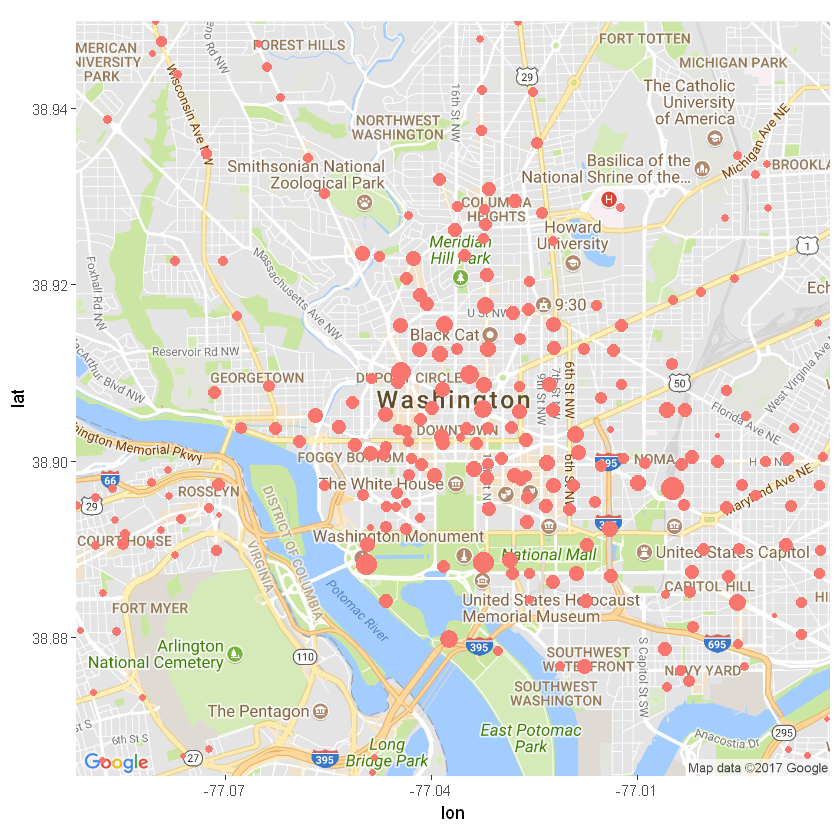

In [6]:
startcounts <- left_join(trips, loc, by="Start.station.number")
startcounts <- startcounts %>% group_by(Start.station.number) %>% mutate(count=n()) %>% select(Start.station, Start.station.number, SLat, SLong, count)
start=unique(startcounts)
head(start[order(-start$count),], n=5)
#start <- start %>% filter(count> 11852.0) %>% na.omit() %>% select(Start.station.number, count, SLong, SLat)
map <- ggmap(get_map(location="washington dc", zoom = 13, maptype = "roadmap", source = 'google')) #Using Latitude and Longitud
map + geom_point(data = start, aes(x = SLong, y = SLat, size = count, colour="pink"), show.legend = F)

End.station,End.station.number,ELat,ELong,count
Columbus Circle / Union Station,31623,38.89696,-77.00493,71849
Lincoln Memorial,31258,38.88825,-77.04943,60465
Massachusetts Ave & Dupont Circle NW,31200,38.91010,-77.04440,58082
Jefferson Dr & 14th St SW,31247,38.88855,-77.03243,57617
15th & P St NW,31201,38.90985,-77.03444,44720


Warning message:
"Removed 207 rows containing missing values (geom_point)."

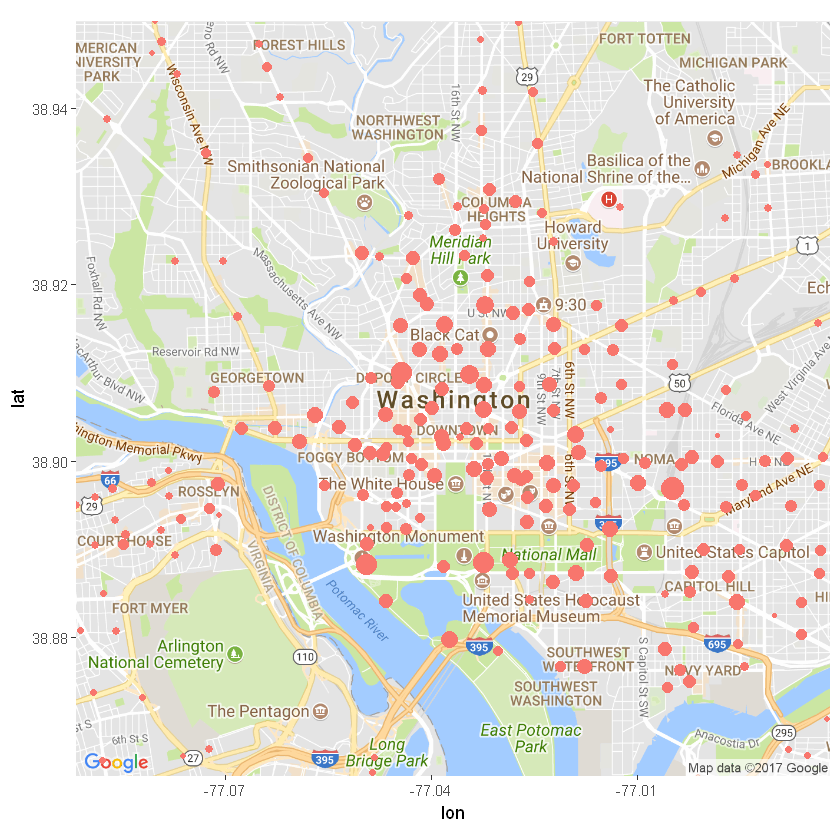

In [7]:
colnames(loc) <- c("End.station.number","ELat", "ELong")

endcounts <- left_join(trips, loc, by="End.station.number")
endcounts <- endcounts %>% group_by(End.station.number) %>% mutate(count=n()) %>% select(End.station, End.station.number, ELat, ELong, count)
end=unique(endcounts)
head(end[order(-end$count),], n=5)
#start <- start %>% filter(count> 11852.0) %>% na.omit() %>% select(Start.station.number, count, SLong, SLat)
#map <- ggmap(get_map(location="washington dc", zoom = 13, maptype = "roadmap", source = 'google')) #Using Latitude and Longitud
map + geom_point(data = end, aes(x = ELong, y = ELat, size = count, colour="pink"), show.legend = F)

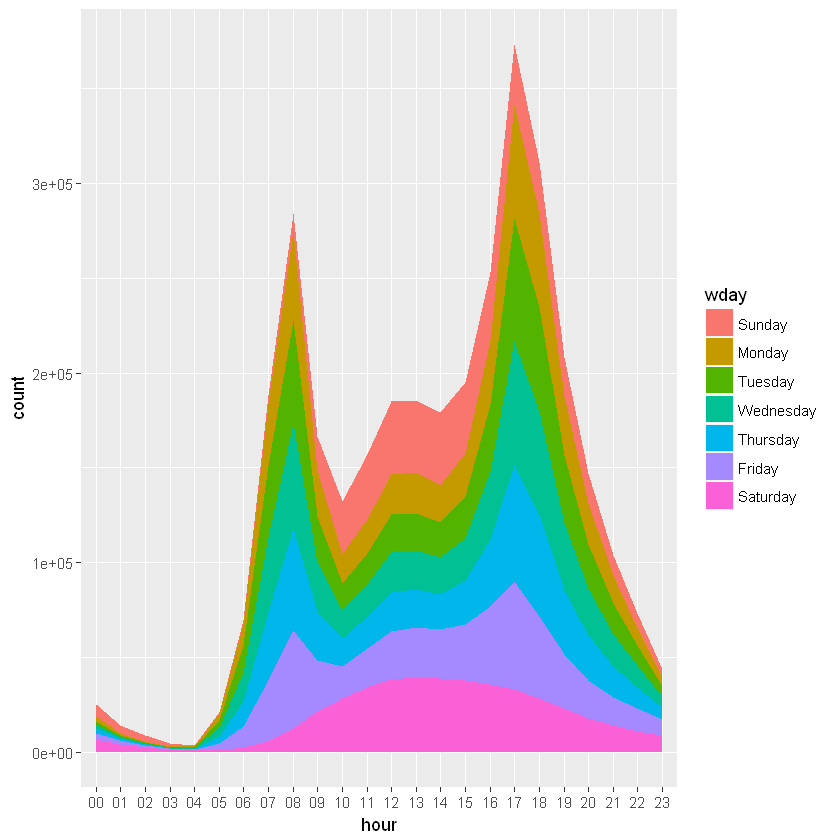

In [8]:
t_start <- trips %>% 
  mutate(wday=weekdays(startDT), hour=strftime(startDT, "%H")) %>% 
  group_by(hour, wday) %>% mutate(count=n()) %>% select(wday, hour, count) %>% unique()
t_start$wday <- factor(t_start$wday, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#head(t_start)
#t_start <- t_start[order(t_start$wday), ]
ggplot(t_start, aes(x=hour,y=count,group=wday,fill=wday)) + geom_area()

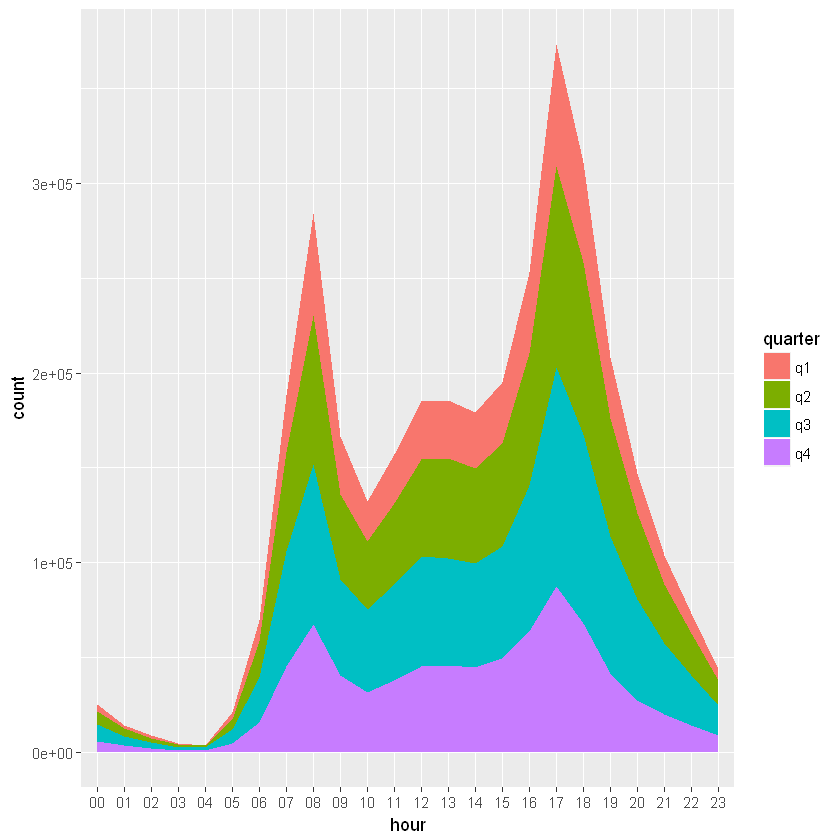

In [9]:
t_start <- trips %>% 
  mutate(wday=weekdays(startDT), hour=strftime(startDT, "%H")) %>% 
  group_by(hour, quarter) %>% mutate(count=n()) %>% select(quarter, hour, count) %>% unique()
#t_start$wday <- factor(t_start$wday, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#head(t_start)
#t_start <- t_start[order(t_start$wday), ]
ggplot(t_start, aes(x=hour,y=count,group=quarter,fill=quarter)) + geom_area()

In [10]:
head(trips)

Duration..ms.,Start.date,End.date,Start.station.number,Start.station,End.station.number,End.station,Bike.number,Member.Type,quarter,startDT,endDT
301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,q1,2016-03-31 23:59:00,2016-04-01 00:04:00
557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,q1,2016-03-31 23:59:00,2016-04-01 00:08:00
555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,q1,2016-03-31 23:59:00,2016-04-01 00:08:00
766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,q1,2016-03-31 23:57:00,2016-04-01 00:09:00
139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,q1,2016-03-31 23:57:00,2016-03-31 23:59:00
967713,3/31/2016 23:57,4/1/2016 0:13,31266,11th & M St NW,31600,5th & K St NW,W20562,Casual,q1,2016-03-31 23:57:00,2016-04-01 00:13:00


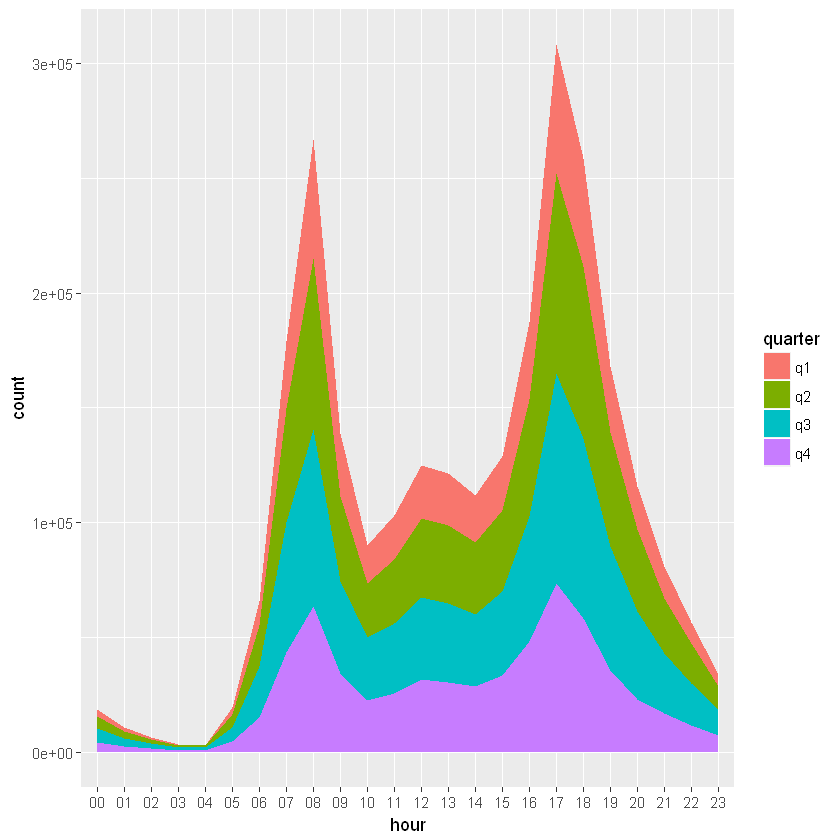

In [13]:
registered=trips %>% filter(Member.Type=="Registered") %>% mutate(wday=weekdays(startDT), hour=strftime(startDT, "%H")) %>% 
  group_by(hour, quarter) %>% mutate(count=n()) %>% select(quarter, hour, count) %>% unique()
#t_start$wday <- factor(t_start$wday, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#head(t_start)
#t_start <- t_start[order(t_start$wday), ]
ggplot(registered, aes(x=hour,y=count,group=quarter,fill=quarter)) + geom_area()


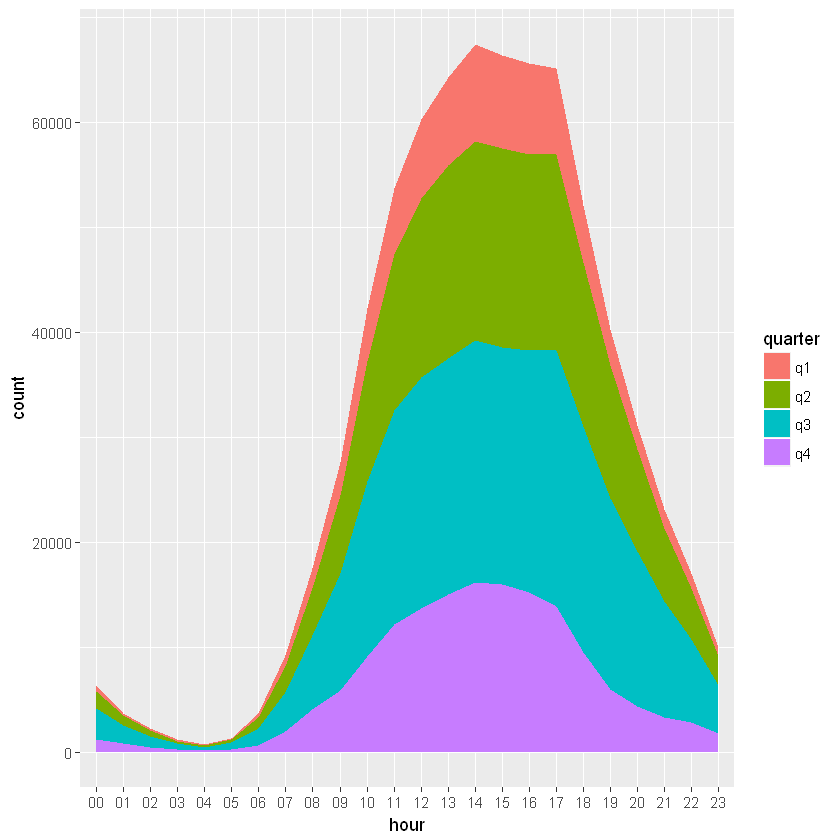

In [14]:
casual=trips %>% filter(Member.Type=="Casual") %>% mutate(wday=weekdays(startDT), hour=strftime(startDT, "%H")) %>% 
  group_by(hour, quarter) %>% mutate(count=n()) %>% select(quarter, hour, count) %>% unique()
#t_start$wday <- factor(t_start$wday, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#head(t_start)
#t_start <- t_start[order(t_start$wday), ]
ggplot(casual, aes(x=hour,y=count,group=quarter,fill=quarter)) + geom_area()


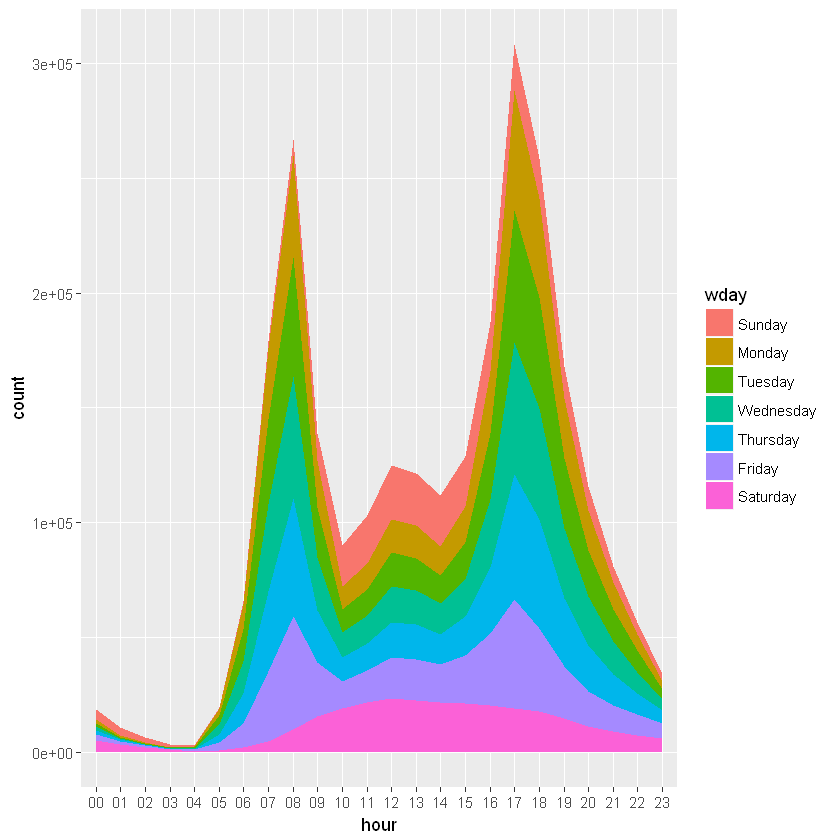

In [17]:
register <- trips %>% filter(Member.Type=="Registered") %>%
  mutate(wday=weekdays(startDT), hour=strftime(startDT, "%H")) %>% 
  group_by(hour, wday) %>% mutate(count=n()) %>% select(wday, hour, count) %>% unique()
register$wday <- factor(register$wday, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#head(t_start)
#t_start <- t_start[order(t_start$wday), ]
ggplot(register, aes(x=hour,y=count,group=wday,fill=wday)) + geom_area()

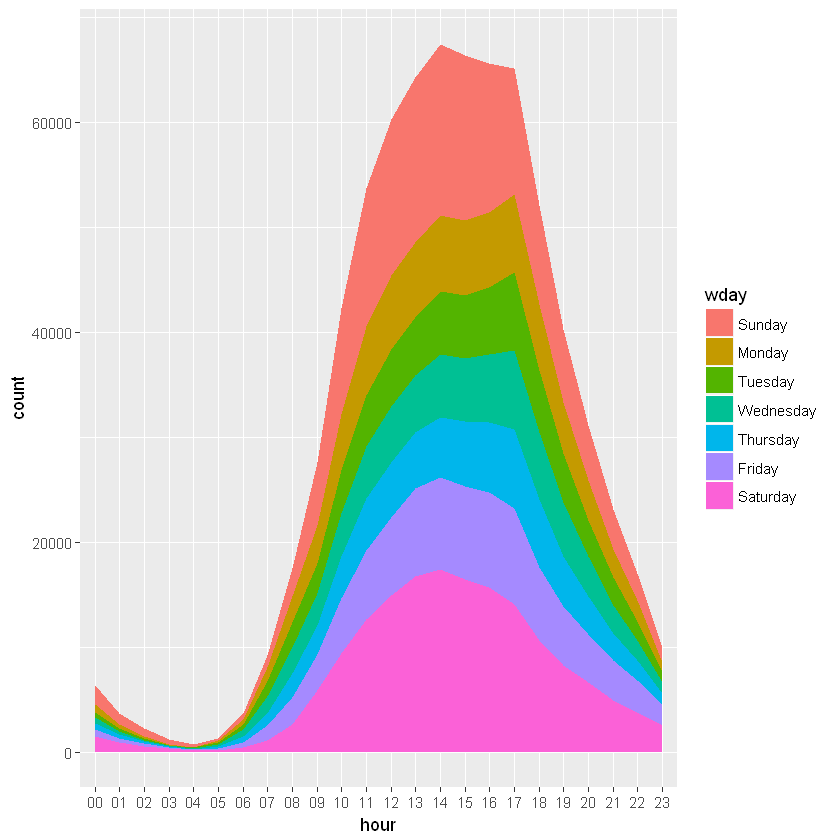

In [19]:
casual <- trips %>% filter(Member.Type=="Casual") %>%
  mutate(wday=weekdays(startDT), hour=strftime(startDT, "%H")) %>% 
  group_by(hour, wday) %>% mutate(count=n()) %>% select(wday, hour, count) %>% unique()
casual$wday <- factor(casual$wday, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#head(t_start)
#t_start <- t_start[order(t_start$wday), ]
ggplot(casual, aes(x=hour,y=count,group=wday,fill=wday)) + geom_area()